In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,OrdinalEncoder

import folium
import plotly.express as px

In [53]:
df_bmw=pd.read_csv("bmw_pricing_v3.csv")
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [54]:
# Cambiamos las columnas de fecha registro y fecha venta a tipo datetime.
for i in ["fecha_registro","fecha_venta"]:
    df_bmw[i]=pd.to_datetime(df_bmw[i])
    

df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [55]:
# Eliminamos la columna de marca, ya que no nos aporta mucha información.
df_bmw.drop('marca',axis=1,inplace=True)

df_bmw.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [43]:
# Creamos dos columnas a partir de la columna fecha registro. La primero indica el mes del registro y la otra el año.
for col in ['fecha_registro']:
    df_bmw[col + '_MES'] = df_bmw[col].dt.month
    df_bmw[col + '_AÑO'] = df_bmw[col].dt.year
        

df_bmw.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_registro_MES,fecha_registro_AÑO
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,2.0,2012.0
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,NaN,NaN
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,4.0,2012.0
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,NaN,NaN
4,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,NaN,NaN


In [44]:
# Filtamos estas columnas para dejar solo los valores sin nulos. Guardamos los cambios en un nuevo dataset. 
columnas_a_limpiar = ['modelo', 'km','potencia','tipo_gasolina','volante_regulable','camara_trasera','elevalunas_electrico','precio','fecha_venta']
df2_bmw = df_bmw.dropna(subset=columnas_a_limpiar)

In [45]:
df2_bmw.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2409
tipo_gasolina                     0
color                           442
tipo_coche                     1449
volante_regulable                 0
aire_acondicionado              482
camara_trasera                    0
asientos_traseros_plegables    3373
elevalunas_electrico              0
bluetooth                       725
gps                               0
alerta_lim_velocidad            725
precio                            0
fecha_venta                       0
fecha_registro_MES             2409
fecha_registro_AÑO             2409
dtype: int64

In [46]:
df2_bmw.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_registro_MES,fecha_registro_AÑO
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,2.0,2012.0
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,NaN,NaN
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,4.0,2012.0
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,NaN,NaN
4,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,NaN,NaN


In [50]:
df3_bmw = df2_bmw.copy()

In [51]:
# Quitamos los outliers de la columna 'km'. 
df3_bmw.drop(df3_bmw[((df3_bmw["km"]<0) | (df3_bmw["km"]>400000))].index, inplace=True)


<Axes: >

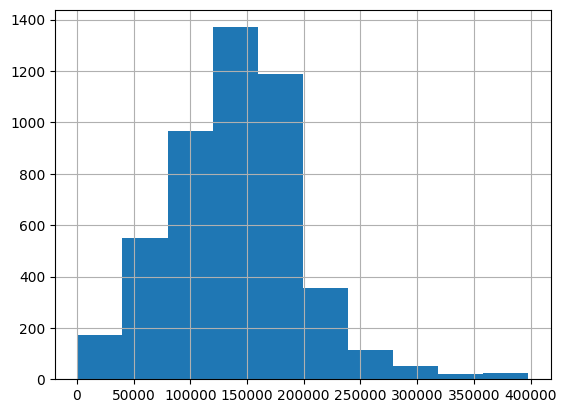

In [48]:
df2_bmw['km'].hist()

modelo 
 modelo
320                748
520                631
318                566
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 tipo_gasolina
diesel           4618
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64 

color 
 color
black     1496
grey      1068
blue       642
white      484
brown      302
silver     291
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64 

tipo_coche 
 tipo_coche
estate         1102
sedan           819
suv             755
hatchback       488
subcompact       77
coupe            75
convertible      30
van              29
Name: count, dtype: int64 

volante_regulable 
 volante_regulable
True 

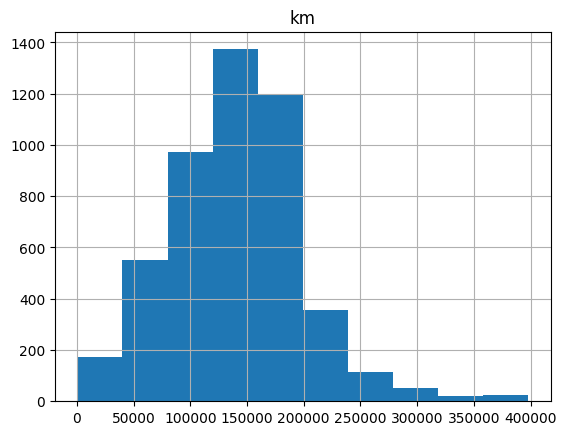

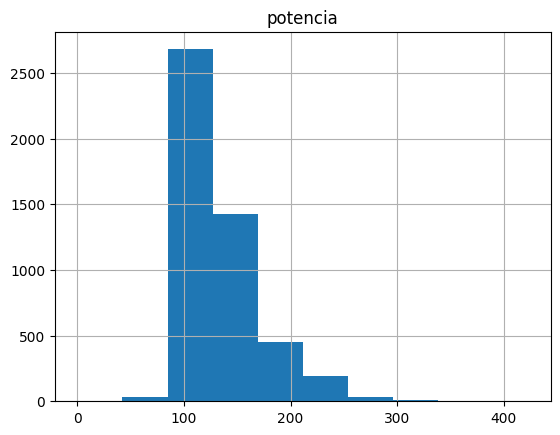

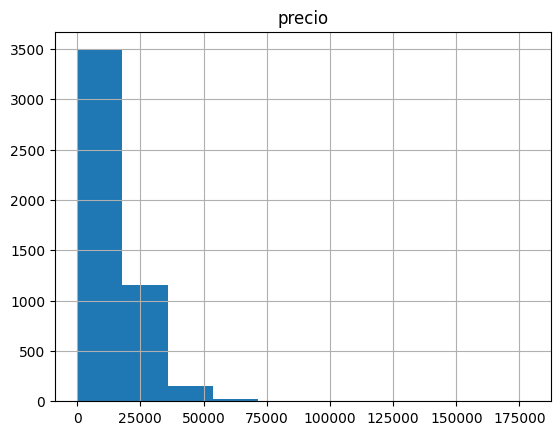

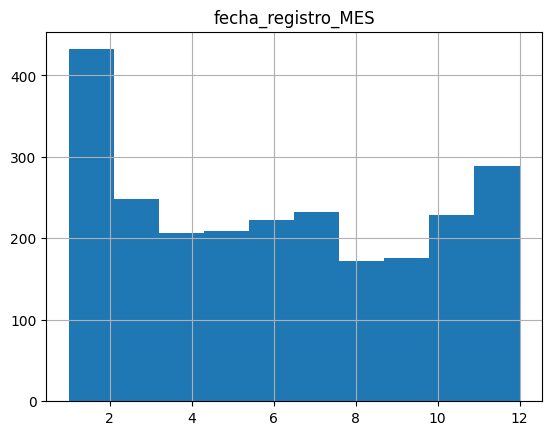

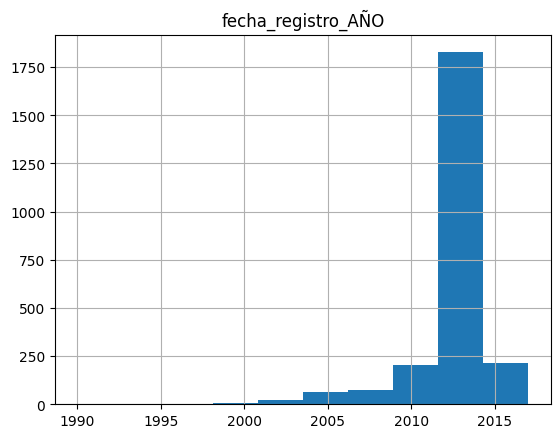

In [132]:
# Bucle para ver en general las columnas. 
for i in df2_bmw:
  if (df2_bmw[i].dtype.kind == "O") or (df2_bmw[i].dtype.kind == "B"):
    print(i,'\n', df_bmw[i].value_counts(), '\n')
  elif (df2_bmw[i].dtype.kind=="f") or (df2_bmw[i].dtype.kind=="i"):
    print(df_bmw.hist(i))